Training Accuracy Score: 99.5%
Validation Accuracy Score: 99.3%


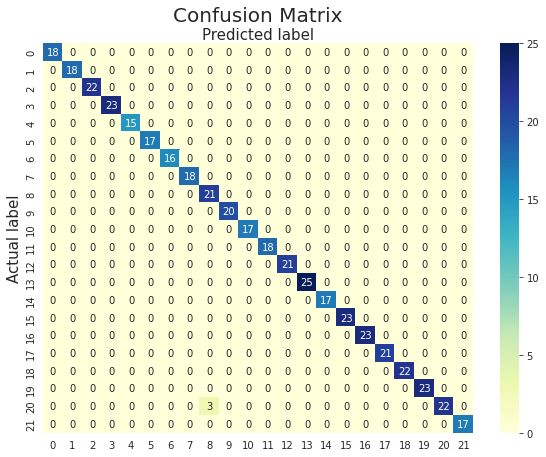

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [2]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import plotly.graph_objects as go
import plotly.io as pio
import pickle
from sklearn.utils import resample
# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve

# Validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline, make_pipeline

# Tuning
from sklearn.model_selection import GridSearchCV

# Feature Extraction
from sklearn.feature_selection import RFE

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, LabelEncoder

# Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensembles
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

warnings.filterwarnings('ignore')


sns.set_style("whitegrid", {'axes.grid' : False})
pio.templates.default = "plotly_white"




def read_in_and_split_data(data, target):
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test



def NormalizedModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()
    elif nameOfScaler == 'normalizer':
        scaler = Normalizer()
    elif nameOfScaler == 'binarizer':
        scaler = Binarizer()


def fit_model(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=num_folds, shuffle=True, random_state=0)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

def save_model(model,filename):
    pickle.dump(model, open(filename, 'wb'))

def classification_metrics(model, conf_matrix):
    print(f"Training Accuracy Score: {model.score(X_train, y_train) * 100:.1f}%")
    print(f"Validation Accuracy Score: {model.score(X_test, y_test) * 100:.1f}%")
    fig,ax = plt.subplots(figsize=(8,6))
    sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap = 'YlGnBu',fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title('Confusion Matrix', fontsize=20, y=1.1)
    plt.ylabel('Actual label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()
    print(classification_report(y_test, y_pred))
    

# Load Dataset
df = pd.read_csv('Crop_recommendation.csv')

# Remove Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Split Data to Training and Validation set
target ='label'
X_train, X_test, y_train, y_test = read_in_and_split_data(df, target)

# Train model
pipeline = make_pipeline(StandardScaler(),  GaussianNB())
model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_metrics(pipeline, conf_matrix)

# save model
save_model(model, 'model.pkl')